<img src="https://logo-marque.com/wp-content/uploads/2021/11/Walmart-Logo.png" alt="WALMART LOGO" />

# Walmart : predict weekly sales

## Company's Description 📇

Walmart Inc. is an American multinational retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores from the United States, headquartered in Bentonville, Arkansas. The company was founded by Sam Walton in 1962.

## Project 🚧

Walmart's marketing service has asked you to build a machine learning model able to estimate the weekly sales in their stores, with the best precision possible on the predictions made. Such a model would help them understand better how the sales are influenced by economic indicators, and might be used to plan future marketing campaigns.


In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('/home/jovyan/FULLSTACK/MOD4_SUPERVISE/PROJET/PROJECT_WALMART/Walmart_Store_sales.csv')

In [3]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [4]:
dataset.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
mean,9.866667,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000
max,20.000000,2.771397e+06,1.000000,91.650000,4.193000,226.968844,14.313000


In [5]:
#ici nous gardons seulement le dataset qui a des dates non nulles
dataset = dataset[~dataset['Date'].isnull()]
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


<b>Préparation du dataset

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales    10.606061
Holiday_Flag     7.575758
Temperature     10.606061
Fuel_Price       9.848485
CPI              7.575758
Unemployment     9.090909
dtype: float64

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         132 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  118 non-null    float64
 3   Holiday_Flag  122 non-null    float64
 4   Temperature   118 non-null    float64
 5   Fuel_Price    119 non-null    float64
 6   CPI           122 non-null    float64
 7   Unemployment  120 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.3+ KB


In [9]:
dataset.shape

(132, 8)

In [10]:
#from pandas_profiling import ProfileReport

In [11]:
#profile = ProfileReport(dataset)
#profile

In [12]:
#ici nous supprimons les lignes qui n'ont pas de target value "weekly sales"

In [13]:
dataset = dataset.dropna(how='any', subset=['Weekly_Sales'])

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         118 non-null    float64
 1   Date          118 non-null    object 
 2   Weekly_Sales  118 non-null    float64
 3   Holiday_Flag  109 non-null    float64
 4   Temperature   107 non-null    float64
 5   Fuel_Price    107 non-null    float64
 6   CPI           109 non-null    float64
 7   Unemployment  107 non-null    float64
dtypes: float64(7), object(1)
memory usage: 8.3+ KB


In [15]:
dataset.shape

(118, 8)

Nous n'avons plus que 118 lignes

In [16]:
print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Percentage of missing values: 


Store           0.000000
Date            0.000000
Weekly_Sales    0.000000
Holiday_Flag    7.627119
Temperature     9.322034
Fuel_Price      9.322034
CPI             7.627119
Unemployment    9.322034
dtype: float64

In [17]:
#on supprime la colonne date
df = dataset.drop('Date',axis=1) 

In [18]:
df['Temperature'].describe()

count    107.000000
mean      60.711589
std       17.961676
min       18.790000
25%       45.465000
50%       61.790000
75%       75.430000
max       91.650000
Name: Temperature, dtype: float64

In [19]:
import numpy as np

In [20]:
#on supprime les outliers
df = df[df['Temperature'].between((df['Temperature'].mean()-3*df['Temperature'].std()),(df['Temperature'].mean()+3*df['Temperature'].std()))]

In [21]:
df['Fuel_Price'].describe()

count    96.000000
mean      3.275135
std       0.480343
min       2.514000
25%       2.816250
50%       3.291000
75%       3.682500
max       4.193000
Name: Fuel_Price, dtype: float64

In [22]:
df = df[df['Fuel_Price'].between((df['Fuel_Price'].mean()-3*df['Fuel_Price'].std()),(df['Fuel_Price'].mean()+3*df['Fuel_Price'].std()))]

In [23]:
df['CPI'].describe()

count     91.000000
mean     179.194838
std       39.570441
min      126.111903
25%      132.078532
50%      196.919506
75%      214.832191
max      226.968844
Name: CPI, dtype: float64

In [24]:
df = df[df['CPI'].between((df['CPI'].mean()-3*df['CPI'].std()),(df['CPI'].mean()+3*df['CPI'].std()))]

In [25]:
df['CPI'].describe()

count     91.000000
mean     179.194838
std       39.570441
min      126.111903
25%      132.078532
50%      196.919506
75%      214.832191
max      226.968844
Name: CPI, dtype: float64

In [26]:
df['Unemployment'].describe()

count    84.000000
mean      7.617548
std       1.700656
min       5.143000
25%       6.552250
50%       7.419000
75%       8.100750
max      14.313000
Name: Unemployment, dtype: float64

In [27]:
df = df[df['Unemployment'].between((df['Unemployment'].mean()-3*df['Unemployment'].std()),(df['Unemployment'].mean()+3*df['Unemployment'].std()))]

In [28]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.00
Weekly_Sales     0.00
Holiday_Flag    11.25
Temperature      0.00
Fuel_Price       0.00
CPI              0.00
Unemployment     0.00
dtype: float64

In [29]:
#On remplace les valeurs manquantes par la médiane
df['Holiday_Flag'] = df['Holiday_Flag'].fillna(df['Holiday_Flag'].median())

In [30]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

In [31]:
#dernières petites modification de type pour faciliter l'interprétation

In [32]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype(int)
df['Store'] = df['Store'].astype(int)

In [33]:
#Explanatory variables (X) We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.
#Categorical variables : Store, Holiday_Flag
#Numerical variables : Temperature, Fuel_Price, CPI, Unemployment

<B>Exploratory data analysis

In [34]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [35]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

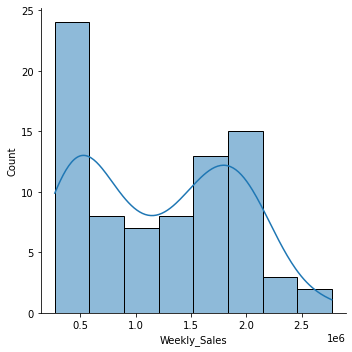

In [36]:
#regardons la répartition de la variable à prédire
sns.displot(data=df, x="Weekly_Sales", kde = True)

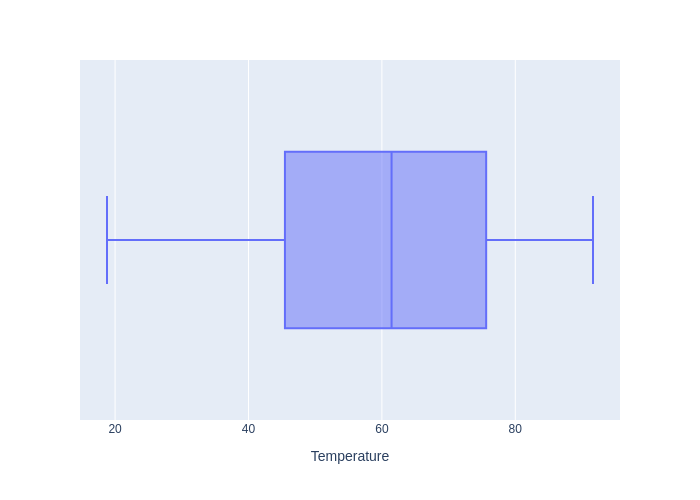

In [37]:
fig = px.box(data_frame=df , x = 'Temperature')
fig.show('png')
#enlever png pour avoir le graphique intéractif plotly

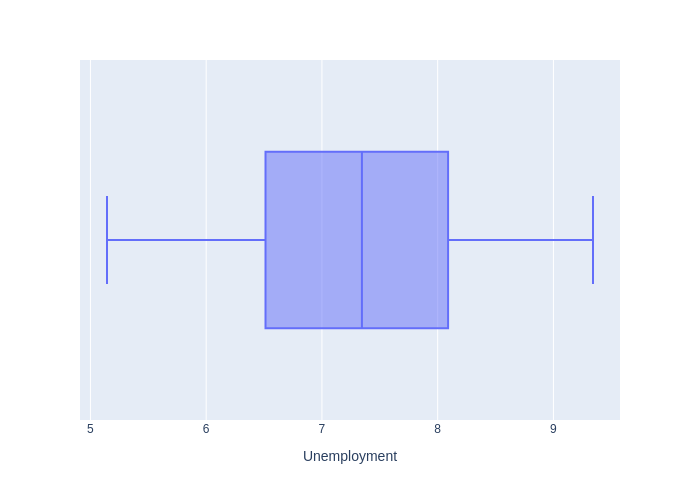

In [38]:
fig = px.box(data_frame=df , x = 'Unemployment')
fig.show('png')
#taux en pourcentage

Nous pouvons observer que 50% sont comprises dans le rectangle, avec une médiane supérieure à 60F

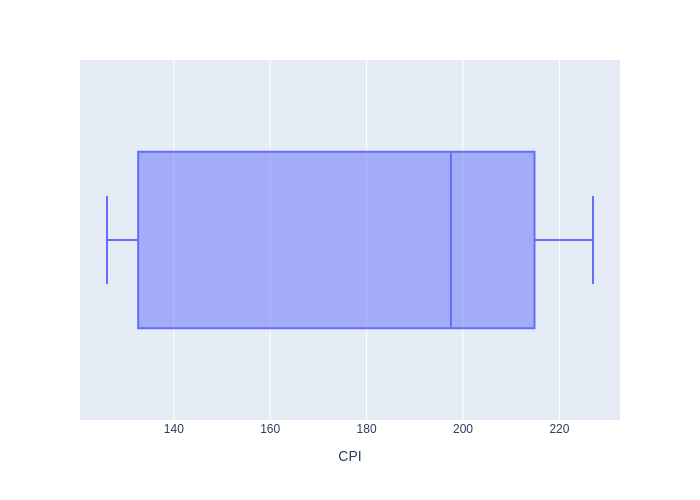

In [39]:
fig = px.box(data_frame=df, x = 'CPI')
fig.show('png')

CPI = Consumer Price Index (permet de mesure l'inflation

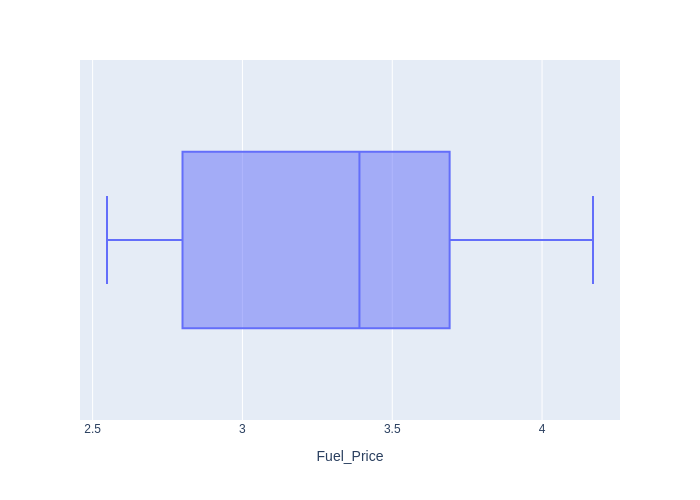

In [40]:
fig = px.box(data_frame=df , x = 'Fuel_Price')
fig.show('png')

<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

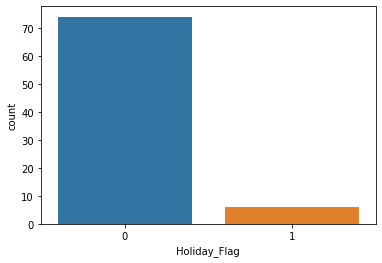

In [41]:
#regardons la répartition de la variable à prédire
sns.countplot(data=df, x="Holiday_Flag")

Holiday Flag = 1, si la semaine est une semaine spéciale de vacances

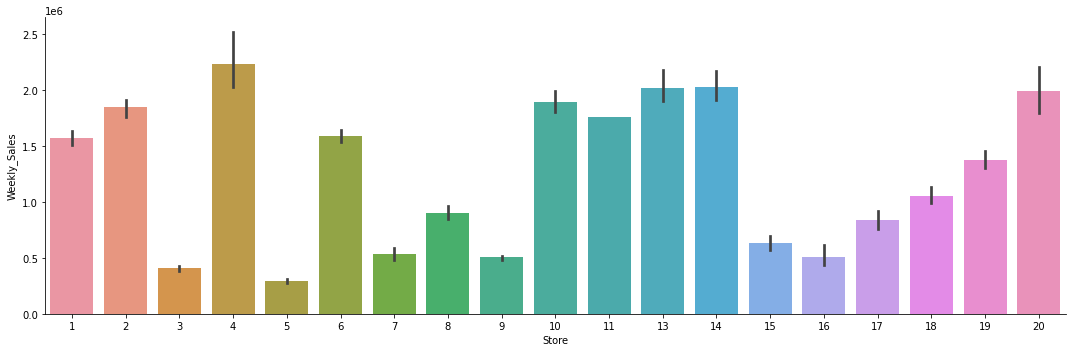

In [42]:
#le total des ventes par store
sns.catplot(x="Store", y= "Weekly_Sales",data=df,kind="bar",height=5,aspect=3)

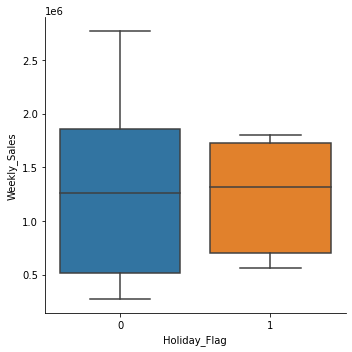

In [43]:
sns.catplot(x="Holiday_Flag", y="Weekly_Sales", data = df, kind="box")

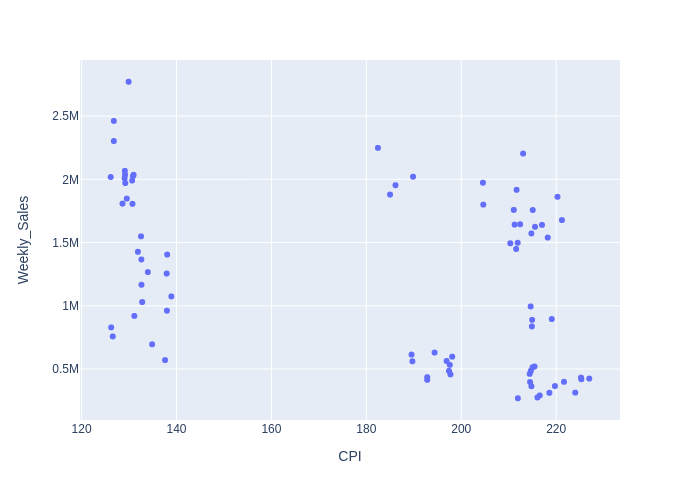

In [44]:
fig = px.scatter(data_frame=df , x = 'CPI', y = 'Weekly_Sales' )
fig.show('png')

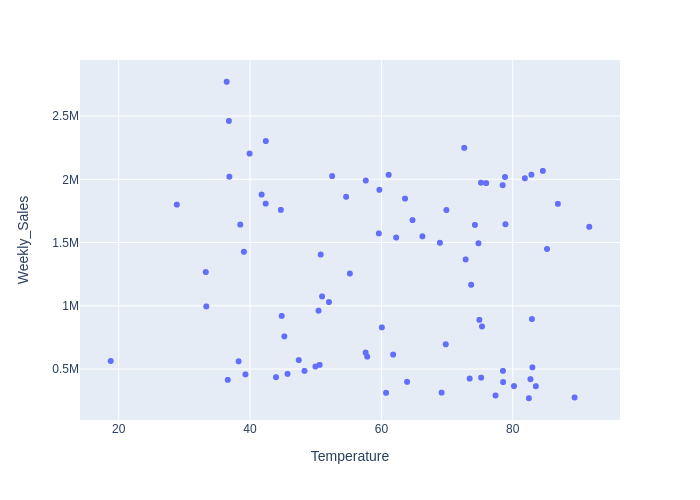

In [45]:
fig = px.scatter(data_frame=df , x = 'Temperature', y = 'Weekly_Sales' )
fig.show('png')

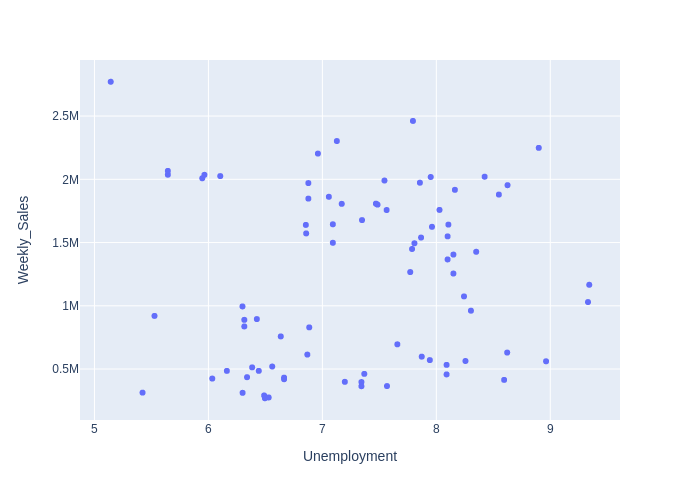

In [46]:
fig = px.scatter(data_frame=df , x = 'Unemployment', y = 'Weekly_Sales' )
fig.show('png')

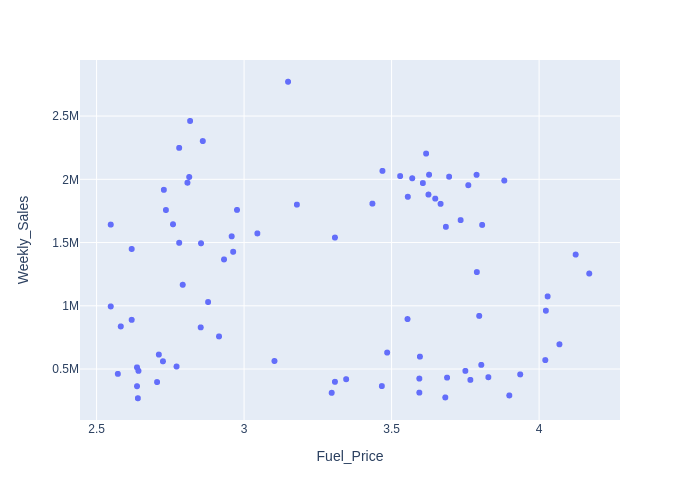

In [47]:
fig = px.scatter(data_frame=df , x = 'Fuel_Price', y = 'Weekly_Sales' )
fig.show('png')

In [48]:
#regardons les corrélations entre les variables
corr = df.corr()
corr

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000,0.143935,-0.026820,-0.326788,0.189832,-0.576600,0.257358
Weekly_Sales,0.143935,1.000000,0.001822,-0.084087,-0.012375,-0.424322,0.081263
Holiday_Flag,-0.026820,0.001822,1.000000,-0.327194,-0.197865,0.189467,0.088495
Temperature,-0.326788,-0.084087,-0.327194,1.000000,-0.091914,0.198291,-0.245277
Fuel_Price,0.189832,-0.012375,-0.197865,-0.091914,1.000000,-0.242058,-0.037071
CPI,-0.576600,-0.424322,0.189467,0.198291,-0.242058,1.000000,-0.091395
Unemployment,0.257358,0.081263,0.088495,-0.245277,-0.037071,-0.091395,1.000000


<AxesSubplot:>

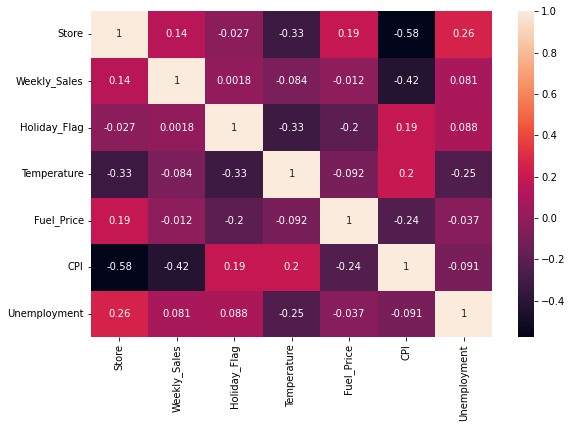

In [49]:
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(corr, annot = True, ax = ax)

<b>Machine Learning

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

In [51]:
#Explanatory variables (X) We need to identify which columns contain categorical variables and which columns contain numerical variables, as they will be treated differently.
#Categorical variables : Store, Holiday_Flag
#Numerical variables : Temperature, Fuel_Price, CPI, Unemployment, Year, Month, Day, DayOfWeek

In [52]:
print("Separating labels from features...")

X = df.drop(['Weekly_Sales'],axis=1)
Y = df.loc[:,'Weekly_Sales']

print("...Done.")
print()

Separating labels from features...
...Done.



In [53]:
X.head()

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,0,59.61,3.045,214.777523,6.858
1,13,0,42.38,3.435,128.616064,7.470
4,6,0,78.89,2.759,212.412888,7.092
6,15,0,69.80,4.069,134.855161,7.658
7,20,0,39.93,3.617,213.023622,6.961


In [54]:
Y.head()

0    1572117.54
1    1807545.43
4    1644470.66
6     695396.19
7    2203523.20
Name: Weekly_Sales, dtype: float64

In [55]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [56]:
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 15.          0.         69.8         4.069     134.8551613   7.658    ]
 [  4.          0.         81.85        3.57      129.0663      5.946    ]
 [  7.          0.         36.61        3.767     192.826069    8.595    ]
 [  1.          1.         38.51        2.548     211.2421698   8.106    ]
 [ 18.          0.         73.67        2.792     132.6141935   9.342    ]]
[[  2.          0.         44.69        2.976     211.0648881   8.028    ]
 [  2.          0.         54.63        3.555     220.275944    7.057    ]]

[ 695396.19 2008344.92  414094.05 1641957.44 1166117.85]
[1758050.79 1861802.7 ]


In [57]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,0,59.61,3.045,214.777523,6.858
1,13,0,42.38,3.435,128.616064,7.470
4,6,0,78.89,2.759,212.412888,7.092
6,15,0,69.80,4.069,134.855161,7.658
7,20,0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...
139,7,0,50.60,3.804,197.588605,8.090
143,3,0,78.53,2.705,214.495838,7.343
144,3,0,73.44,3.594,226.968844,6.034
145,14,0,72.62,2.780,182.442420,8.899


In [58]:
# Create pipeline for categorical features
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[ # missing values will be replaced by most frequent value
    ('one', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [59]:
# Create pipeline for numeric features
numeric_features = [2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[ 
    ('scaler', StandardScaler())
])

In [60]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [61]:
# Preprocessings on train set
print("Performing preprocessings on train set...")

X_train = preprocessor.fit_transform(X_train)
print('...Done.')


# Preprocessings on test set
print("Performing preprocessings on test set...")

X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.


Performing preprocessings on train set...
...Done.
Performing preprocessings on test set...


In [62]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


<B> EVALUATION DU MODEL SUR LE JEU DE DONNEES D'ENTRAINEMENT

In [63]:
print("Score on training")
Y_train_predict= regressor.predict(X_train)
print("Linear Regression R_2 Score : ", r2_score(Y_train, Y_train_predict))
print("Linear Regression mean squared error : ", mean_squared_error(Y_train, Y_train_predict))
print("Linear Regression mean absolute error : ", mean_absolute_error(Y_train, Y_train_predict))

Score on training
Linear Regression R_2 Score :  0.9766794787893393
Linear Regression mean squared error :  10585582031.447687
Linear Regression mean absolute error :  78316.80743206914


<B> EVALUATION DU MODEL SUR LE JEU DE DONNEES TEST

In [64]:
print("Score on test")
Y_test_predict= regressor.predict(X_test)
print("Linear Regression R_2 Score : ", r2_score(Y_test, Y_test_predict))
print("Linear Regression mean squared error : ", mean_squared_error(Y_test, Y_test_predict))
print("Linear Regression mean absolute error : ", mean_absolute_error(Y_test, Y_test_predict))

Score on test
Linear Regression R_2 Score :  0.9649502268607824
Linear Regression mean squared error :  16268160303.547886
Linear Regression mean absolute error :  117563.82302847589


Il n'y a pas d'overfitting

In [65]:
regressor.coef_

array([  -42994.5531989 ,  -119227.73596467,   966303.57707616,
         -51223.95259721,   285716.48387426, -1343762.4925805 ,
        2725258.92353837, -1369231.83982817,   -65738.4848601 ,
        -492605.57498765,  -861048.44048124, -1283532.69047637,
        2511481.83893111,   153296.77502188,  2547782.84091153,
        1271938.73724562,  1163167.15871727,  -646644.23149478,
        1267496.2285953 ,  1508384.44326354,  1821946.3708458 ,
         548858.3810668 ,  -116871.43138366])

In [66]:
list_tranform = list(X.columns)+list(preprocessor.named_transformers_['cat'].named_steps['one'].get_feature_names_out(input_features=X.columns[categorical_features]))

In [67]:
data_coef_reg = pd.concat([pd.DataFrame(list_tranform),pd.DataFrame(np.transpose(abs(regressor.coef_)))], axis = 1)

In [68]:
data_coef_reg.columns = ['Features_name','coef']

In [69]:
#coefficient en valeur absolue
data_coef_reg.sort_values(by='coef',ascending=False)

,Features_name,coef
6,Store_2.0,2.725259e+06
14,Store_10.0,2.547783e+06
12,Store_8.0,2.511482e+06
20,Store_17.0,1.821946e+06
19,Store_16.0,1.508384e+06
7,Store_3.0,1.369232e+06
5,Unemployment,1.343762e+06
11,Store_7.0,1.283533e+06
15,Store_11.0,1.271939e+06
18,Store_15.0,1.267496e+06


Il manque 2 coefficients car on a encodé en supprimant à chaque fois une catégorie

Etudions la P-value pour comprendre quelles sont les coefficients qui ne sont pas statistiquement significants

In [70]:
import statsmodels.api as sm

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [71]:
X_stats=X_train.toarray()
Y_stats=Y_train

X_stats = sm.add_constant(X_stats)
model_ = sm.OLS(Y_stats, X_stats)
results = model_.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     72.84
Date:                Tue, 31 May 2022   Prob (F-statistic):           9.08e-26
Time:                        14:41:03   Log-Likelihood:                -829.46
No. Observations:                  64   AIC:                             1707.
Df Residuals:                      40   BIC:                             1759.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.571e+05   4.23e+05      1.554      0.1

In [72]:
results.pvalues>0.05

array([ True,  True, False, False,  True,  True, False, False, False,
        True, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False,  True])

Ainsi X1, X9, X14, X17,X19 et X23 ne sont pas importants

<b>TEST DU MODEL RIDGE

In [73]:
from sklearn.linear_model import Ridge

In [74]:
#avec l'hyperparametre alpha = 1 
ridge_model=Ridge()

ridge_model.fit(X_train,Y_train)

Ridge()

<b>EVALUATION DU MODEL SUR JEU DE DONNEES TRAIN

In [75]:
print("Ridge_Score on training")
Y_train_predict= ridge_model.predict(X_train)
print("Ridge Linear Regression R_2 Score : ", r2_score(Y_train, Y_train_predict))
print("Ridge Linear Regression mean squared error : ", mean_squared_error(Y_train, Y_train_predict))
print("Ridge Linear Regression mean absolute error : ", mean_absolute_error(Y_train, Y_train_predict))

Ridge_Score on training
Ridge Linear Regression R_2 Score :  0.9047907460337736
Ridge Linear Regression mean squared error :  43217103035.91746
Ridge Linear Regression mean absolute error :  161355.43137245058


<b>EVALUATION DU MODEL SUR JEU DE DONNEES TEST

In [76]:
print("Ridge_Score on test")
Y_test_predict= ridge_model.predict(X_test)
print("Ridge Linear Regression R_2 Score : ", r2_score(Y_test, Y_test_predict))
print("Ridge Linear Regression mean squared error : ", mean_squared_error(Y_test, Y_test_predict))
print("Ridge Linear Regression mean absolute error : ", mean_absolute_error(Y_test, Y_test_predict))

Ridge_Score on test
Ridge Linear Regression R_2 Score :  0.8938525744058612
Ridge Linear Regression mean squared error :  49267746427.7852
Ridge Linear Regression mean absolute error :  179823.1178713005


Il n'y a pas d'overfitting

Essayons de faire une cross-validation

In [77]:
scores=cross_val_score(ridge_model,X_train,Y_train,cv=3,scoring="r2")
print(scores)
print(scores.mean())

[0.32200598 0.73549792 0.81479227]
0.6240987254730223


Essayons de trouver le meilleur hyperparametre alpha pour un meilleur score

In [78]:
alpha=[]

for i in range(0,11,1):
    c=i/10
    alpha.append(c)

print(alpha)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [79]:
#nous faisons une GridSearch, c'est à dire que le modèle va tester plusieurs hyperparametres tout en faisant une cross-validation de 3
params={'alpha':alpha}
gridsearch = GridSearchCV(ridge_model, param_grid = params, cv = 3,verbose=1) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)
print("Best estimator : ", gridsearch.best_estimator_)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
...Done.
Best hyperparameters :  {'alpha': 0.0}
Best R2 score :  0.7831173764858846
Best estimator :  Ridge(alpha=0.0)


In [80]:
gridsearch.cv_results_

{'mean_fit_time': array([0.00763194, 0.00396101, 0.00281207, 0.00273975, 0.00271646,
        0.0025955 , 0.0025688 , 0.00252581, 0.00246755, 0.00286913,
        0.0024511 ]),
 'std_fit_time': array([7.05929736e-04, 1.29162430e-03, 7.90012193e-05, 4.23859391e-05,
        5.59216807e-05, 5.11070429e-05, 5.44981043e-05, 6.31597771e-05,
        2.13073243e-05, 5.88399117e-04, 5.81224313e-05]),
 'mean_score_time': array([0.00055806, 0.00037607, 0.0003655 , 0.00035572, 0.00035588,
        0.00035636, 0.00035095, 0.00035119, 0.00033545, 0.00040603,
        0.00035961]),
 'std_score_time': array([8.23977583e-05, 1.87774708e-05, 1.24997444e-05, 1.09793417e-05,
        1.01942337e-05, 2.01237459e-05, 1.60515504e-05, 1.38870721e-05,
        4.26940156e-06, 7.96781907e-05, 3.31126319e-06]),
 'param_alpha': masked_array(data=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
 

In [81]:
#Maintenant testons le meilleur hyperparametre sur le jeu de données train et test
print("Ridge Best Estimator Score on training")
Y_train_predict= gridsearch.best_estimator_.predict(X_train)
print("Ridge Best Estimator Linear Regression R_2 Score : ", r2_score(Y_train, Y_train_predict))
print("Ridge Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_train, Y_train_predict))
print("Ridge Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_train, Y_train_predict))

Ridge Best Estimator Score on training
Ridge Best Estimator Linear Regression R_2 Score :  0.9741540216364065
Ridge Best Estimator Linear Regression mean squared error :  11731930074.777624
Ridge Best Estimator Linear Regression mean absolute error :  82552.23452309043


In [82]:
print("Ridge Best Estimator Score on test")
Y_test_predict= gridsearch.best_estimator_.predict(X_test)
print("Ridge Best Estimator Linear Regression R_2 Score : ", r2_score(Y_test, Y_test_predict))
print("Ridge Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_test, Y_test_predict))
print("Ridge Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_test, Y_test_predict))

Ridge Best Estimator Score on test
Ridge Best Estimator Linear Regression R_2 Score :  0.9672211286630354
Ridge Best Estimator Linear Regression mean squared error :  15214133665.31744
Ridge Best Estimator Linear Regression mean absolute error :  106930.51077536978


En utilisant la contrainte de pénalisation du modèle par Ridge, on va pénaliser les coefficients les plus importants mais on garde toutes les variables, contrairement au modèle de pénalisation Lasso, que nous allons essayer ci-dessous, qui supprime les variables non importantes

<b> TEST DU MODELE LASSO

In [83]:
from sklearn.linear_model import Lasso

In [84]:
#avec l'hyperparametre par défaut alpha = 1 
lasso_model=Lasso(max_iter=10000000)

lasso_model.fit(X_train,Y_train)

Lasso(max_iter=10000000)

In [85]:
scores=cross_val_score(lasso_model,X_train,Y_train,cv=3,scoring="r2")
print(scores)
print(scores.mean())

[-2.06478321  0.89341134  0.914822  ]
-0.08551662313997939


<b> Test du modèle sur le jeu de données d'entraînement

In [86]:
print("Lasso_Score on training")
Y_train_predict= lasso_model.predict(X_train)
print("Lasso Linear Regression R_2 Score : ", r2_score(Y_train, Y_train_predict))
print("Lasso Linear Regression mean squared error : ", mean_squared_error(Y_train, Y_train_predict))
print("Lasso Linear Regression mean absolute error : ", mean_absolute_error(Y_train, Y_train_predict))

Lasso_Score on training
Lasso Linear Regression R_2 Score :  0.9766791173584529
Lasso Linear Regression mean squared error :  10585746091.086903
Lasso Linear Regression mean absolute error :  78324.58796651728


<b> Test du modèle sur le jeu de données Test

In [87]:
print("Lasso_Score on test")
Y_test_predict= lasso_model.predict(X_test)
print("Lasso Linear Regression R_2 Score : ", r2_score(Y_test, Y_test_predict))
print("Lasso Linear Regression mean squared error : ", mean_squared_error(Y_test, Y_test_predict))
print("Lasso Linear Regression mean absolute error : ", mean_absolute_error(Y_test, Y_test_predict))

Lasso_Score on test
Lasso Linear Regression R_2 Score :  0.9650559296318022
Lasso Linear Regression mean squared error :  16219098941.106253
Lasso Linear Regression mean absolute error :  117387.75324813504


Essayons de trouver le meilleur hyperparametre alpha pour un meilleur score

In [88]:
alpha=range(0,10000,10)

In [89]:
params={'alpha':alpha}

gridsearch = GridSearchCV(lasso_model, param_grid = params, cv = 3,verbose=1) 
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)
print("Best estimator : ", gridsearch.best_estimator_)

Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 163917077807.57455, tolerance: 1573781506.0281057

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:609: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 182868824514.9391, tolerance: 2284273126.020421

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: U

...Done.
Best hyperparameters :  {'alpha': 870}
Best R2 score :  0.7872778141974702
Best estimator :  Lasso(alpha=870, max_iter=10000000)


In [90]:
#testons le meilleur hyperparametre sur le jeu de données d'entraînement

In [91]:
print("Lasso Best Estimator Score on training")
Y_train_predict= gridsearch.best_estimator_.predict(X_train)
print("Lasso Best Estimator Linear Regression R_2 Score : ", r2_score(Y_train, Y_train_predict))
print("Lasso Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_train, Y_train_predict))
print("Lasso Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_train, Y_train_predict))

Lasso Best Estimator Score on training
Lasso Best Estimator Linear Regression R_2 Score :  0.9721453368739408
Lasso Best Estimator Linear Regression mean squared error :  12643706322.672146
Lasso Best Estimator Linear Regression mean absolute error :  83071.7667233047


In [92]:
#et sur le jeu de données test

In [93]:
print("Lasso Best Estimator Score on test")
Y_test_predict= gridsearch.best_estimator_.predict(X_test)
print("Lasso Best Estimator Linear Regression R_2 Score : ", r2_score(Y_test, Y_test_predict))
print("Lasso Best Estimator Linear Regression mean squared error : ", mean_squared_error(Y_test, Y_test_predict))
print("Lasso Best Estimator Linear Regression mean absolute error : ", mean_absolute_error(Y_test, Y_test_predict))

Lasso Best Estimator Score on test
Lasso Best Estimator Linear Regression R_2 Score :  0.9788025702197825
Lasso Best Estimator Linear Regression mean squared error :  9838670975.645481
Lasso Best Estimator Linear Regression mean absolute error :  76220.5037495706


Le modèle qui a obtenu le meilleur R_2 score est le modèle Lasso avec le meilleur parametre alpha trouvé grâce à la GridSearch.
La pénalisation du modèle de régression linéaire avec le modèle Lasso permet de supprimer les variables qui ne sont pas importantes, permettant ainsi de mieux généraliser le modèle sur les données test et donc obtenir un meilleur score.
Il reste une erreur absolue moyenne de 76 220$, c'est à dire que le modèle peut se tromper en positif ou en négatif de cette marge d'erreur.
Le dataset n'est pas très conséquent, on pourrait encore améliorer le modèle avec plus de données.